# Introduction

**Marketing is aobut connecting the best products or services to the right customers. In today's digital world, personalizatino is essential for meeting customer's needs more effectively, thereby incresing customer satisfaction and the likelihood of repeat purchases.** 

**Recommeder systems are set of algorithms which recommend most relevant items to users based on their preferences predicted using the algorithms. it acts on behavioural data, such as customer's previous purchase, ratings or reviews to predict their likelihood of buying a new product or service.**

**For example, Amazon's `'Customers who buy this item also bought'`, Netflix's `'Shows and movies you may want to watch'` are examples of recommendation systems**

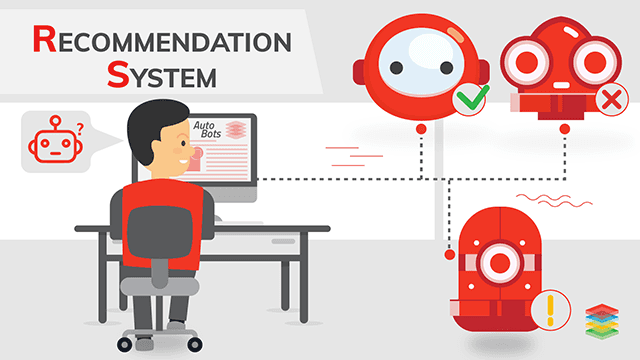!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ml-latest-smallratings/ratings.csv
/kaggle/input/groceries-dataset/Groceries_dataset.csv
/kaggle/input/moviesdataset/movies.csv
/kaggle/input/groceriesdataset/groceries.csv


# 1. Assiciation rules mining (Market basket analysis)

In [2]:
all_txns = []

with open('/kaggle/input/groceriesdataset/groceries.csv') as f:
    # read each lines
    content = f.readlines()
    # Remove white space at the end of each lines
    txns = [x.strip() for x in content]
    # iterate through each line and create a list of trxns
    for each_txn in txns:
        all_txns.append(each_txn.split(','))   
        
all_txns[:5]

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese ', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product']]

## Metrics for association rules mining

**1. Support**

**2. Confidence**

**3. Lift**

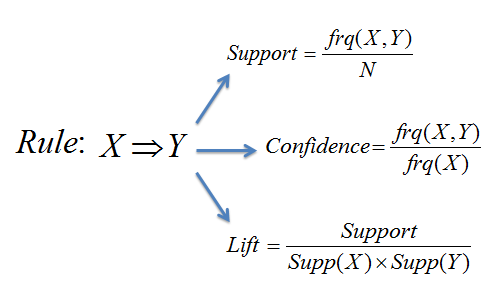

In [3]:
# importing required libraries
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [4]:
# initialize the onehot transect
oht = TransactionEncoder()
ohtxns = oht.fit(all_txns).transform(all_txns)
oht_df = pd.DataFrame(ohtxns, columns=oht.columns_)
oht_df.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [5]:
oht_df.shape

(9835, 171)

In [6]:
len(oht_df.columns)

171

In [7]:
# applyting apriori algorithm
frequent_itemsets = apriori(oht_df,
                           min_support=0.02,
                           use_colnames=True)
frequent_itemsets.sample(10, random_state=50)

,support,itemsets
44,0.108998,(root vegetables)
21,0.058973,(frankfurter)
87,0.023183,"(other vegetables, shopping bags)"
16,0.058058,(coffee)
117,0.032232,"(whipped/sour cream, whole milk)"
3,0.026029,(beverages)
59,0.021251,"(beef, whole milk)"
93,0.020946,"(pastry, rolls/buns)"
112,0.020844,"(tropical fruit, soda)"
53,0.104931,(tropical fruit)


In [8]:
# shape of the itemsets
frequent_itemsets.shape

(122, 2)

In [9]:
# generate association rules
rules = association_rules(frequent_itemsets,
                         metric='lift',
                         min_threshold=1)
rules.sample(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
26,(other vegetables),(domestic eggs),0.193493,0.063447,0.022267,0.115081,1.813824,0.009991,1.058350
75,(whole milk),(pork),0.255516,0.057651,0.022166,0.086749,1.504719,0.007435,1.031862
108,(whipped/sour cream),(whole milk),0.071683,0.255516,0.032232,0.449645,1.759754,0.013916,1.352735
104,(tropical fruit),(whole milk),0.104931,0.255516,0.042298,0.403101,1.577595,0.015486,1.247252
79,(sausage),(rolls/buns),0.093950,0.183935,0.030605,0.325758,1.771048,0.013324,1.210344


In [10]:
# shape of the rules dataframe
rules.shape

(126, 9)

In [11]:
# sort by confidence level of each itemsets
rules.sort_values('confidence', ascending = False)[:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
120,"(other vegetables, yogurt)",(whole milk),0.043416,0.255516,0.022267,0.512881,2.007235,0.011174,1.528340
16,(butter),(whole milk),0.055414,0.255516,0.027555,0.497248,1.946053,0.013395,1.480817
24,(curd),(whole milk),0.053279,0.255516,0.026131,0.490458,1.919481,0.012517,1.461085
114,"(other vegetables, root vegetables)",(whole milk),0.047382,0.255516,0.023183,0.489270,1.914833,0.011076,1.457687
116,"(root vegetables, whole milk)",(other vegetables),0.048907,0.193493,0.023183,0.474012,2.449770,0.013719,1.533320
29,(domestic eggs),(whole milk),0.063447,0.255516,0.029995,0.472756,1.850203,0.013783,1.412030
108,(whipped/sour cream),(whole milk),0.071683,0.255516,0.032232,0.449645,1.759754,0.013916,1.352735
90,(root vegetables),(whole milk),0.108998,0.255516,0.048907,0.448694,1.756031,0.021056,1.350401
51,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,0.026291,1.426693
32,(frozen vegetables),(whole milk),0.048094,0.255516,0.020437,0.424947,1.663094,0.008149,1.294636


### Observations:

1. from above rules we can learn that from our market basket analysis, when consumer buys (yogurt,other vegetables) chances of buying whole milk are around 51%.

# 2. Collaborative filtering

**Collaborative filtering is based on the notion of similarity (or distance). For example, if two users A and B have purchased the same products and have rated them similarly on common rating scale, then A and B can be considered in similar in nature and their buying behaviour. Hence, if A buys a new product and rate high, then that product can be recommended to B and vice-versa.**

**Collborative filtering comes in two variations:**
1. User-Based Similarity
2. Item-Based Similarity

## 1. User-based similarity

In [12]:
df2 = pd.read_csv('/kaggle/input/ml-latest-smallratings/ratings.csv')
df2.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [14]:
df2.drop('timestamp', axis=1, inplace=True)

In [15]:
len(df2.userId.unique()), len(df2.movieId.unique())

(610, 9724)

In [16]:
# create a pivot dataframe with index as a userid and columns as a movieid
um_df = df2.pivot(index = 'userId',
                  columns = 'movieId',
                  values = 'rating').reset_index(drop=True)
um_df.index = df2.userId.unique()
um_df.iloc[:5,:15]

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# use fillna method to convert NaN to zeros
um_df.fillna(0, inplace=True)
um_df.iloc[:5,:15]

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# calculating cosine similarity between users
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

user_sim = 1 - pairwise_distances(um_df.values, 
                                  metric = 'cosine')
# store the results in a dataframe
user_sim_df = pd.DataFrame(user_sim)
# set the index and columns of the dataframe
user_sim_df.index = df2.userId.unique()
user_sim_df.columns = df2.userId.unique()
user_sim_df.head()

,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
1,1.000000,0.027283,0.059720,0.194395,0.129080,0.128152,0.158744,0.136968,0.064263,0.016875,...,0.080554,0.164455,0.221486,0.070669,0.153625,0.164191,0.269389,0.291097,0.093572,0.145321
2,0.027283,1.000000,0.000000,0.003726,0.016614,0.025333,0.027585,0.027257,0.000000,0.067445,...,0.202671,0.016866,0.011997,0.000000,0.000000,0.028429,0.012948,0.046211,0.027565,0.102427
3,0.059720,0.000000,1.000000,0.002251,0.005020,0.003936,0.000000,0.004941,0.000000,0.000000,...,0.005048,0.004892,0.024992,0.000000,0.010694,0.012993,0.019247,0.021128,0.000000,0.032119
4,0.194395,0.003726,0.002251,1.000000,0.128659,0.088491,0.115120,0.062969,0.011361,0.031163,...,0.085938,0.128273,0.307973,0.052985,0.084584,0.200395,0.131746,0.149858,0.032198,0.107683
5,0.129080,0.016614,0.005020,0.128659,1.000000,0.300349,0.108342,0.429075,0.000000,0.030611,...,0.068048,0.418747,0.110148,0.258773,0.148758,0.106435,0.152866,0.135535,0.261232,0.060792


In [19]:
user_sim_df.shape

(610, 610)

In [20]:
# remove the diagonal values of similarity with itself
np.fill_diagonal(user_sim, 0)
user_sim_df.loc[:5, :10]

,1,2,3,4,5,6,7,8,9,10
1,0.000000,0.027283,0.059720,0.194395,0.129080,0.128152,0.158744,0.136968,0.064263,0.016875
2,0.027283,0.000000,0.000000,0.003726,0.016614,0.025333,0.027585,0.027257,0.000000,0.067445
3,0.059720,0.000000,0.000000,0.002251,0.005020,0.003936,0.000000,0.004941,0.000000,0.000000
4,0.194395,0.003726,0.002251,0.000000,0.128659,0.088491,0.115120,0.062969,0.011361,0.031163
5,0.129080,0.016614,0.005020,0.128659,0.000000,0.300349,0.108342,0.429075,0.000000,0.030611


In [21]:
# Filtering similar users of first 5 user id
user_sim_df.idxmax(axis=1)[:5]

1    266
2    366
3    313
4    391
5    470
dtype: int64

**for user id 1 most similar user is user id no. 266 and so no..**

In [22]:
user_sim_df.iloc[1:2, 360:370]

,361,362,363,364,365,366,367,368,369,370
2,0.012776,0.115081,0.084261,0.0,0.149578,0.300074,0.031699,0.008637,0.016431,0.034816


**As we can see user id no 2 is most similar to user id no 366**

In [23]:
# load the movies dataset for finding common movies of similar users
movies_df = pd.read_csv('/kaggle/input/moviesdataset/movies.csv')
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [24]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [25]:
# find movies similar users are watching
def get_user_similar_movies( user1, user2):
    # innner join between the movies they watched
    common_movies = df2[df2.userId == user1].merge(df2[df2.userId == user2],
                                                  on = 'movieId',
                                                  how= 'inner')
    # return the common movies with movies they watched from movies dataframe
    return common_movies.merge(movies_df, on = 'movieId')

In [26]:
# example of merge method of pandas
df2[df2.userId == 2].merge(df2[df2.userId == 366], on = 'movieId', how='inner')

,userId_x,movieId,rating_x,userId_y,rating_y
0,2,3578,4.0,366,4.5
1,2,6874,4.0,366,4.0
2,2,48516,4.0,366,4.5
3,2,58559,4.5,366,4.0
4,2,68157,4.5,366,4.5
5,2,79132,4.0,366,4.0
6,2,91529,3.5,366,4.0
7,2,109487,3.0,366,5.0
8,2,122882,5.0,366,2.0


In [27]:
# find the common movies of user id 2 and 336
common_movies = get_user_similar_movies(2, 366)
common_movies

,userId_x,movieId,rating_x,userId_y,rating_y,title,genres
0,2,3578,4.0,366,4.5,Gladiator (2000),Action|Adventure|Drama
1,2,6874,4.0,366,4.0,Kill Bill: Vol. 1 (2003),Action|Crime|Thriller
2,2,48516,4.0,366,4.5,"Departed, The (2006)",Crime|Drama|Thriller
3,2,58559,4.5,366,4.0,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX
4,2,68157,4.5,366,4.5,Inglourious Basterds (2009),Action|Drama|War
5,2,79132,4.0,366,4.0,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX
6,2,91529,3.5,366,4.0,"Dark Knight Rises, The (2012)",Action|Adventure|Crime|IMAX
7,2,109487,3.0,366,5.0,Interstellar (2014),Sci-Fi|IMAX
8,2,122882,5.0,366,2.0,Mad Max: Fury Road (2015),Action|Adventure|Sci-Fi|Thriller


In [28]:
# find most highly commonaly rated movies 
common_movies[(common_movies.rating_x >= 4.0) & (common_movies.rating_y >= 4.0)]

,userId_x,movieId,rating_x,userId_y,rating_y,title,genres
0,2,3578,4.0,366,4.5,Gladiator (2000),Action|Adventure|Drama
1,2,6874,4.0,366,4.0,Kill Bill: Vol. 1 (2003),Action|Crime|Thriller
2,2,48516,4.0,366,4.5,"Departed, The (2006)",Crime|Drama|Thriller
3,2,58559,4.5,366,4.0,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX
4,2,68157,4.5,366,4.5,Inglourious Basterds (2009),Action|Drama|War
5,2,79132,4.0,366,4.0,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX


### Challanges with user-based similarity

**It is only used after users watch few movies and rate them. for new users it is not suitable to recommend movies with user-based approch**

## 2. Item-based similarity

In [29]:
# pivot based on movie rating
rating_mat = df2.pivot(index= 'movieId',
                            columns = 'userId',
                            values = 'rating').reset_index(drop = True)
#rating_mat.index = movies_df.movieId
rating_mat.loc[:5, :15]

userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5
1,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
4,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN


In [30]:
rating_mat.shape

(9724, 610)

In [31]:
rating_mat.fillna(0, inplace=True)
# find the correlation between the movies
movie_sim = 1 - pairwise_distances(rating_mat.values,
                                  metric='correlation')
movie_sim_df = pd.DataFrame(movie_sim)
movie_sim_df.loc[:5, :15]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.000000,0.231327,0.173213,-0.028917,0.192474,0.192686,0.143743,0.085477,0.177245,0.183382,0.172799,0.159352,0.106217,0.099645,0.031566,0.111011
1,0.231327,1.000000,0.191945,0.071269,0.200526,0.158341,0.127569,0.141540,-0.021045,0.285086,0.217090,0.115290,0.163556,0.033185,0.191785,0.108676
2,0.173213,0.191945,1.000000,0.067143,0.370171,0.196442,0.351513,0.296897,0.275812,0.136916,0.174251,0.168038,0.118157,0.136819,0.111644,0.216929
3,-0.028917,0.071269,0.067143,1.000000,0.167910,0.053755,0.258075,0.148726,-0.016025,0.056000,0.128247,-0.016306,0.142266,0.095113,0.145606,0.082152
4,0.192474,0.200526,0.370171,0.167910,1.000000,0.215503,0.429890,0.265777,0.308085,0.110833,0.201002,0.173630,0.089913,0.220718,0.070170,0.108118
5,0.192686,0.158341,0.196442,0.053755,0.215503,1.000000,0.148109,0.114707,0.167909,0.251343,0.182082,0.115893,-0.013484,0.242880,0.091079,0.408483


In [32]:
movie_sim_df.shape

(9724, 9724)

In [33]:
np.fill_diagonal(movie_sim, 0)
movie_sim_df.loc[:5,:15]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.000000,0.231327,0.173213,-0.028917,0.192474,0.192686,0.143743,0.085477,0.177245,0.183382,0.172799,0.159352,0.106217,0.099645,0.031566,0.111011
1,0.231327,0.000000,0.191945,0.071269,0.200526,0.158341,0.127569,0.141540,-0.021045,0.285086,0.217090,0.115290,0.163556,0.033185,0.191785,0.108676
2,0.173213,0.191945,0.000000,0.067143,0.370171,0.196442,0.351513,0.296897,0.275812,0.136916,0.174251,0.168038,0.118157,0.136819,0.111644,0.216929
3,-0.028917,0.071269,0.067143,0.000000,0.167910,0.053755,0.258075,0.148726,-0.016025,0.056000,0.128247,-0.016306,0.142266,0.095113,0.145606,0.082152
4,0.192474,0.200526,0.370171,0.167910,0.000000,0.215503,0.429890,0.265777,0.308085,0.110833,0.201002,0.173630,0.089913,0.220718,0.070170,0.108118
5,0.192686,0.158341,0.196442,0.053755,0.215503,0.000000,0.148109,0.114707,0.167909,0.251343,0.182082,0.115893,-0.013484,0.242880,0.091079,0.408483


In [34]:
# finding most similar movies
def get_similar_movies( movieid, topN):
    # get the index of the movie record in movies_df
    movieidx = movies_df[movies_df.movieId == movieid].index[0]
    movies_df['similarity'] = movie_sim_df.iloc[movieidx]
    top_n = movies_df.sort_values(['similarity'], ascending=False)[0:topN]
    return top_n

In [35]:
# recommendation of 5 movies based on similarity for movie id on 858
get_similar_movies(858, 5)

,movieId,title,genres,similarity
921,1220,"Blues Brothers, The (1980)",Action|Comedy|Musical,0.769390
913,1212,"Third Man, The (1949)",Film-Noir|Mystery|Thriller,0.560246
895,1192,Paris Is Burning (1990),Documentary,0.496048
827,1088,Dirty Dancing (1987),Drama|Musical|Romance,0.442128
520,608,Fargo (1996),Comedy|Crime|Drama|Thriller,0.418042


# 3. Using Surprise library (KNNBasic & Matrix factorization)

**For real-world implementations, we need a more extensive library which hides all the implamentation details and provides abstract application programming interface(APIs) to build recommender systems. Surprise is a python library for accomplishing this. it provides the following features:**

1. Various read-to-use prediction algorithms like neighborhood methods, and matrix factorizaiton-based. it has a built in similarity measures such as cosine, mean square distance(MSD), Pearson correlation coefficient, etc.

2. Tools to evalute, analyze, and compaer the performance of the algorithms. It also provides methods to recommend.

In [36]:
from surprise import Dataset, Reader, KNNBasic, accuracy
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV

In [37]:
# read the dataset in surprise module
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(df2[['userId','movieId','rating']], reader=reader)

In [38]:
# set coeffiecient and similarity parameters for building model
item_based_cosine_sim = {'name':'pearson',
                         'user_based': True}

# knn model
knn = KNNBasic(k=20,
              min_k=5,
              sim_options = item_based_cosine_sim)

# cross validate with data set with 5 fold cv
cv_results = cross_validate(knn, data, measures=['RMSE'], cv=5, verbose=False)

# return the test accuracy
np.mean(cv_results.get('test_rmse'))

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


0.9711942144006332

In [39]:
# Finding the best model using hyperparameters tuning 
param_grid = {'k': [20],
              'sim_options': {'name': ['cosine'],
                             'user_based': [True, False]}
              }

# grid-search CV instances
grid_cv = GridSearchCV(KNNBasic,
                       param_grid,
                       measures=['rmse'],
                       cv=5,
                       refit=True)
grid_cv.fit(data)

# Best rmse score
print(grid_cv.best_score['rmse'])

# combination of best params
print(grid_cv.best_params['rmse'])

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
0.9751077484865818
{'k': 20, 'sim_options': {'name': 'cosine', 'user_based': True}}


**Best model is user-based collborative filtering with cosine similarity and 20 similar users.**

In [40]:
results_df = pd.DataFrame.from_dict(grid_cv.cv_results)
results_df[['param_k', 'param_sim_options','mean_test_rmse','rank_test_rmse']]

,param_k,param_sim_options,mean_test_rmse,rank_test_rmse
0,20,"{'name': 'cosine', 'user_based': True}",0.975108,1
1,20,"{'name': 'cosine', 'user_based': False}",0.997335,2


In [41]:
# predict the movie rating based on users id and movie id
grid_cv.predict(1,2)

Prediction(uid=1, iid=2, r_ui=None, est=3.7233653693643416, details={'actual_k': 20, 'was_impossible': False})

**From above prediction we can say user 1 would rate movie as a 3.72 as it good chances that he would like the movie so may recommend the movie id 2.**

## SVD algorithm

In [42]:
from surprise import SVD

# use 5 factors for building model
svd = SVD(n_factors = 5)

In [43]:
cv_results = cross_validate(svd,
                            data,
                           measures=['RMSE'],
                           cv=5,
                           verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8716  0.8686  0.8672  0.8628  0.8813  0.8703  0.0062  
Fit time          2.17    2.21    2.19    2.19    2.19    2.19    0.01    
Test time         0.19    0.19    0.35    0.19    0.19    0.22    0.07    


# Conclusions:

**1. In this notebook, we saw three techniques to build recommendation system such as association rules, collborative filtering and matrix factorization using surprise library.**

**2. Association rules are used in retail industry for recommeding most frequently bought items.**

**3. collaborative filtering is used for predict movie rating by a user and recommend similar movies to the users of same preferences.** 